In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
precip = pd.read_pickle("../Dataframes/df_precipitation.pkl")

# Vid vilken period regnar det mest?

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

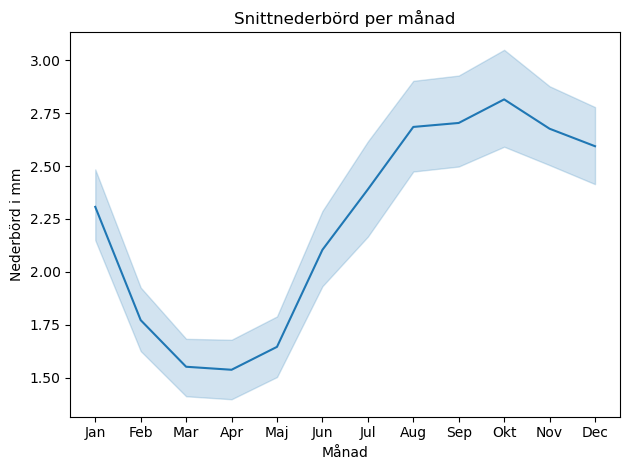

In [3]:
sns.lineplot(x = precip['Month'], y = precip['Nederbördsmängd'], data = precip)
plt.title('Snittnederbörd per månad')
plt.xlabel('Månad')
plt.ylabel('Nederbörd i mm')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'])
plt.tight_layout()
# plt.savefig("../plottar/regnpermanad.png")

* Enligt grafen verkar det helt klart som att höstmånaderna (September, Oktober, November)

In [4]:
oktoberregn = precip.query("Month == 10")
aprilregn = precip.query("Month == 4")
aprilregn.head()

,Representativt dygn,Nederbördsmängd,Kvalitet,Year,Month,Monthly avg
91,1944-04-01,0.0,G,1944,4,1.2
92,1944-04-02,0.0,G,1944,4,1.2
93,1944-04-03,0.0,G,1944,4,1.2
94,1944-04-04,0.0,G,1944,4,1.2
95,1944-04-05,0.0,G,1944,4,1.2


In [5]:
def categorize_value(value):
    if value < 0.1:
        return 'Inget regn'
    elif value >= 0.1 and value <0.5:
        return 'Lätt regn'
    elif value >=0.5 and value <4:
        return 'Måttligt regn'
    else:
        return 'Kraftigt regn'

In [6]:
precip2 = precip

In [7]:
precip2['Klass'] = precip2['Nederbördsmängd'].apply(categorize_value)

In [9]:
precip2 = precip2.query('Nederbördsmängd >= 0.1')
precip2

,Representativt dygn,Nederbördsmängd,Kvalitet,Year,Month,Monthly avg,Klass
0,1944-01-01,0.2,G,1944,1,2.70,Lätt regn
1,1944-01-02,0.4,G,1944,1,2.70,Lätt regn
4,1944-01-05,2.1,G,1944,1,2.70,Måttligt regn
7,1944-01-08,14.3,G,1944,1,2.70,Kraftigt regn
8,1944-01-09,2.9,G,1944,1,2.70,Måttligt regn
...,...,...,...,...,...,...,...
29026,2023-06-21,2.6,G,2023,6,1.31,Måttligt regn
29031,2023-06-26,18.5,G,2023,6,1.31,Kraftigt regn
29032,2023-06-27,10.6,G,2023,6,1.31,Kraftigt regn
29034,2023-06-29,5.0,G,2023,6,1.31,Kraftigt regn


c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

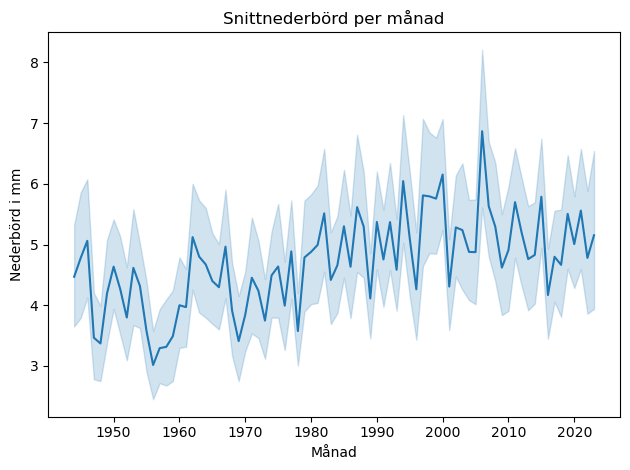

In [10]:
sns.lineplot(x = precip2['Year'], y = precip2['Nederbördsmängd'], data = precip2)
plt.title('Snittnederbörd per månad')
plt.xlabel('Månad')
plt.ylabel('Nederbörd i mm')
# plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'])
plt.tight_layout()

In [11]:
lattregn = precip2.query("Nederbördsmängd >= 0.1 and Nederbördsmängd <0.5")
mattligtregn = precip2.query("Nederbördsmängd >= 0.5 and Nederbördsmängd <= 4")
kraftigtregn = precip2.query("Nederbördsmängd > 4")

In [12]:
lattregn

,Representativt dygn,Nederbördsmängd,Kvalitet,Year,Month,Monthly avg,Klass
0,1944-01-01,0.2,G,1944,1,2.70,Lätt regn
1,1944-01-02,0.4,G,1944,1,2.70,Lätt regn
19,1944-01-20,0.2,G,1944,1,2.70,Lätt regn
30,1944-01-31,0.1,G,1944,1,2.70,Lätt regn
45,1944-02-15,0.1,G,1944,2,0.69,Lätt regn
...,...,...,...,...,...,...,...
28988,2023-05-14,0.2,G,2023,5,0.46,Lätt regn
29021,2023-06-16,0.2,G,2023,6,1.31,Lätt regn
29023,2023-06-18,0.2,G,2023,6,1.31,Lätt regn
29024,2023-06-19,0.1,G,2023,6,1.31,Lätt regn


In [13]:
print(f"Antal dagar sedan 1944 med lätt regn: {len(lattregn['Representativt dygn'].unique())}")
print(f"Antal dagar sedan 1944 med måttligt regn: {len(mattligtregn['Representativt dygn'].unique())}")
print(f"Antal dagar sedan 1944 med kraftigt regn: {len(kraftigtregn['Representativt dygn'].unique())}")

Antal dagar sedan 1944 med lätt regn: 2705
Antal dagar sedan 1944 med måttligt regn: 5862
Antal dagar sedan 1944 med kraftigt regn: 5237


c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

<Axes: xlabel='Year', ylabel='Nederbördsmängd'>

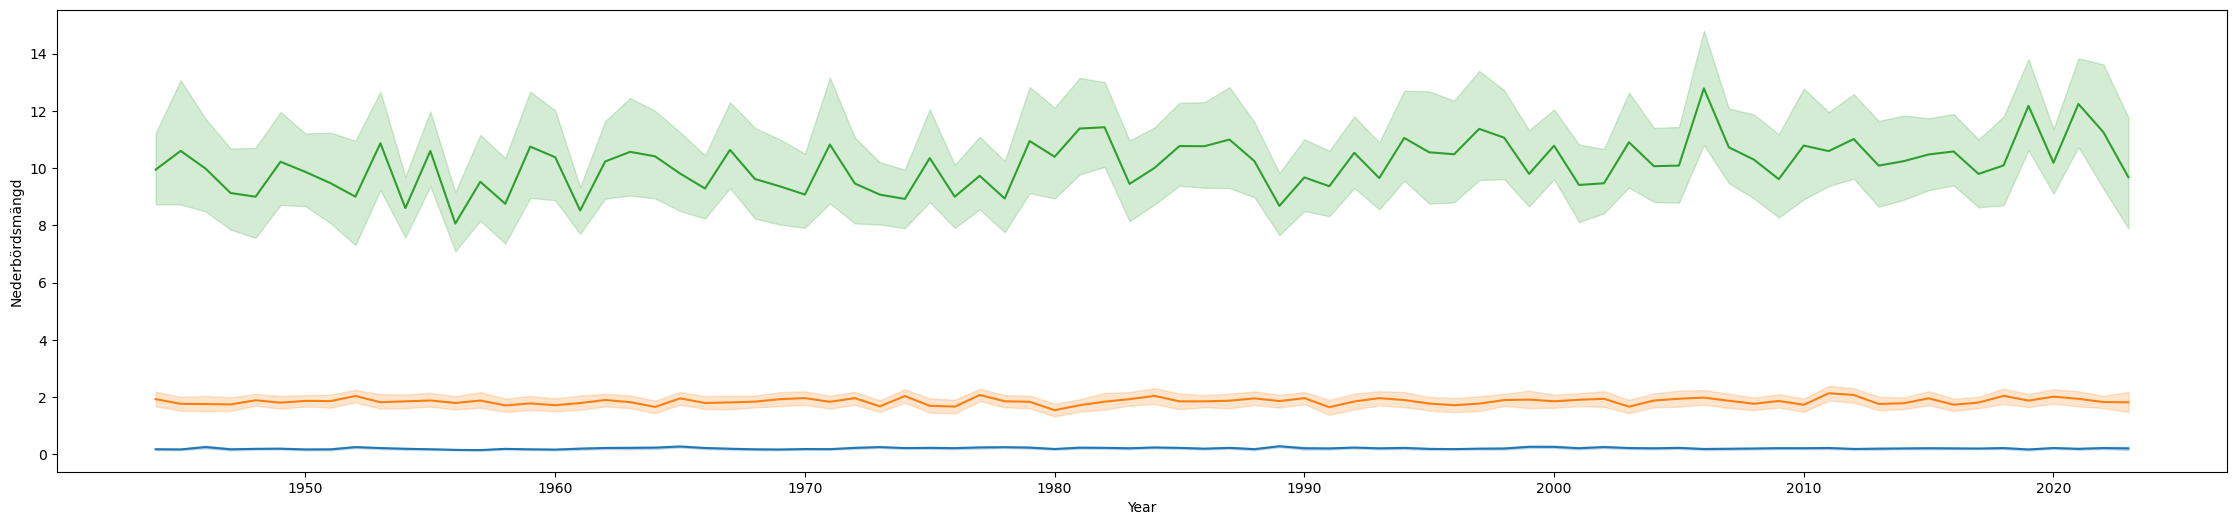

In [14]:
fig, ax = plt.subplots(figsize=(28, 6))
sns.lineplot(data=lattregn, x='Year', y='Nederbördsmängd')
sns.lineplot(data=mattligtregn, x='Year', y='Nederbördsmängd')
sns.lineplot(data=kraftigtregn, x='Year', y='Nederbördsmängd')

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

<Axes: xlabel='Year', ylabel='Nederbördsmängd'>

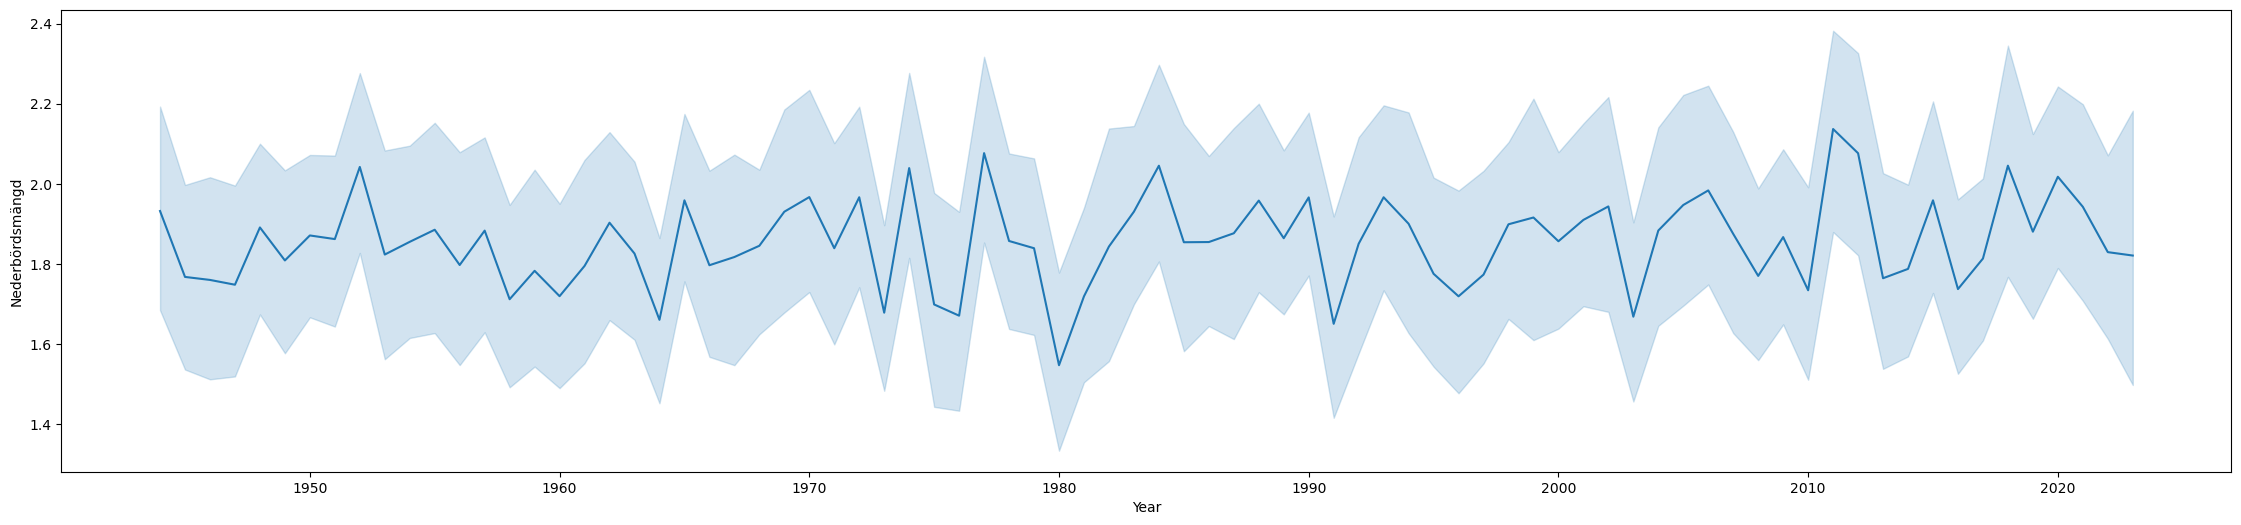

In [15]:
fig, ax = plt.subplots(figsize=(28, 6))
sns.lineplot(data=mattligtregn, x='Year', y='Nederbördsmängd')

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

<Axes: xlabel='Representativt dygn', ylabel='Nederbördsmängd'>

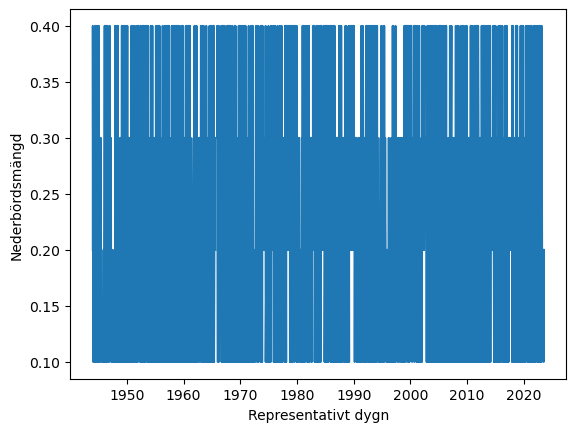

In [16]:
sns.lineplot(data= lattregn, x= 'Representativt dygn', y= 'Nederbördsmängd')

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(42.25000000000001, 0.5, 'Nederbörd i mm')

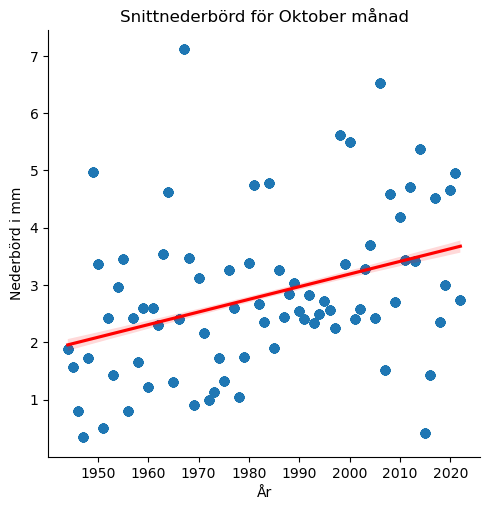

In [17]:
sns.lmplot(x='Year', y='Monthly avg', data=oktoberregn, line_kws={'color': 'red'})
plt.title('Snittnederbörd för Oktober månad')
plt.xlabel('År')
plt.ylabel('Nederbörd i mm')
# plt.savefig('../plottar/oktoberregn.png')

 Som vi ser här så verkar det som att Oktober månad blivit mer regnig på senare år jämfört med tidigare år.
 
Är denna prognosen sann även för den minst regniga månaden April?

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(29.000000000000007, 0.5, 'Nederbörd i mm')

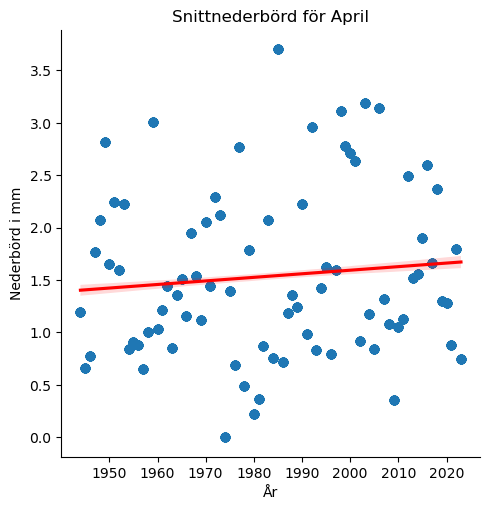

In [18]:
sns.lmplot(x='Year', y='Monthly avg', data=aprilregn, line_kws={'color': 'red'})
plt.title('Snittnederbörd för April')
plt.xlabel('År')
plt.ylabel('Nederbörd i mm')
# plt.savefig('../plottar/aprilregn.png')

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(42.25000000000001, 0.5, 'Nederbörd i mm')

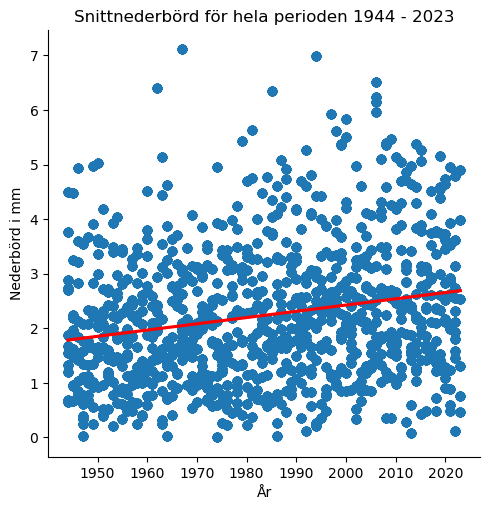

In [19]:
sns.lmplot(x='Year', y='Monthly avg', data=precip, line_kws={'color': 'red'})
plt.title('Snittnederbörd för hela perioden 1944 - 2023')
plt.xlabel('År')
plt.ylabel('Nederbörd i mm')
# plt.savefig("../plottar/regnperår.png")

Det verkar onekligen som att trenden är densamma över tid, vare sig det är vår eller höst